# **Sentiment Analysis on Twitter Data**


## **1. Title**
- Project Name: Sentiment Analysis on Sentiment140 Dataset
- Objective: To analyze the sentiments of tweets using VADER and TextBlob for sentiment scoring and understand lexicon-based sentiment analysis techniques.



## **2. Metadata**
Tools Used:

Python

Libraries: pandas, numpy, nltk, textblob, matplotlib, seaborn
Dataset:

Sentiment140 (1.6 million tweets)
Skills Demonstrated:

- Preprocessing textual data

- Sentiment scoring with VADER and TextBlob

- Evaluation of model performance using labeled data

- Data visualization for sentiment analysis

Outcome:

Insights into sentiment distribution and comparison between lexicon-based sentiment scoring techniques

In [21]:
import pandas as pd
import numpy as np
import nltk
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')


# Downloading required NLTK data
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
# Load the dataset
df = pd.read_csv('/content/sentiment.csv', encoding='ISO-8859-1', header=None)

# Assign column names based on dataset structure
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

# Display the first few rows
df.head()


,target,ids,date,flag,user,text
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


In [23]:
df.shape

(498, 6)

In [24]:
df.isnull().sum()

,0
target,0
ids,0
date,0
flag,0
user,0
text,0


The Sentiment140 dataset is loaded, and columns are assigned proper names. We focus primarily on the text and target columns for this analysis.

In [25]:
# Map target values to labels
df['sentiment'] = df['target'].map({0: 'negative', 4: 'positive'})

# Display the distribution of sentiments
df['sentiment'].value_counts()


,count
sentiment,
positive,182
negative,177


The target column (0 for negative and 4 for positive) is mapped to more understandable labels (negative and positive). We also verify the dataset's class distribution.

In [26]:
import re

# Function to clean text
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Remove mentions
    text = re.sub(r'http\S+', '', text)         # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)     # Remove non-alphabetical characters
    text = text.lower()                        # Convert to lowercase
    return text

# Apply the cleaning function
df['cleaned_text'] = df['text'].apply(clean_text)

df.head()


,target,ids,date,flag,user,text,sentiment,cleaned_text
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...,positive,i loooooooovvvvvveee my kindle not that the d...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...,positive,reading my kindle love it lee childs is good ...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck...",positive,ok first assesment of the kindle it fucking rocks
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...,positive,youll love your kindle ive had mine for a few...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...,positive,fair enough but i have the kindle and i thin...


The text column is preprocessed to remove unnecessary characters, such as mentions, URLs, and special symbols, ensuring the data is clean for analysis.

In [27]:
from nltk.corpus import stopwords

# Define stop words
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    tokens = text.split()
    filtered_words = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_words)

# Apply the function
df['processed_text'] = df['cleaned_text'].apply(remove_stopwords)

df.head()


,target,ids,date,flag,user,text,sentiment,cleaned_text,processed_text
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...,positive,i loooooooovvvvvveee my kindle not that the d...,loooooooovvvvvveee kindle dx cool fantastic right
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...,positive,reading my kindle love it lee childs is good ...,reading kindle love lee childs good read
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck...",positive,ok first assesment of the kindle it fucking rocks,ok first assesment kindle fucking rocks
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...,positive,youll love your kindle ive had mine for a few...,youll love kindle ive mine months never looked...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...,positive,fair enough but i have the kindle and i thin...,fair enough kindle think perfect


## **VADER vs TextBlob: Sentiment Analysis Techniques**

### **1. VADER (Valence Aware Dictionary and sEntiment Reasoner)**

**What is VADER?**  
VADER is a lexicon and rule-based sentiment analysis tool specifically designed to analyze sentiments expressed in text, particularly in social media (e.g., tweets).

**How does it work?**  
- VADER uses a pre-built dictionary of words (lexicon), where each word has an associated sentiment intensity score.  
- Words are scored on a scale from -4 (most negative) to +4 (most positive).  
- VADER accounts for the **context** of words, such as:  
  - **Punctuation:** Exclamation marks (e.g., "Great!!!") increase intensity.  
  - **Capitalization:** Uppercase words ("AWESOME") emphasize sentiment.  
  - **Modifiers:** Words like "very" or "extremely" amplify sentiment strength.  
  - **Negation:** Words like "not" or "never" flip the sentiment.  

**Output Scores:**  
VADER provides four scores:  
- **Positive:** Probability of positive sentiment.  
- **Negative:** Probability of negative sentiment.  
- **Neutral:** Probability of neutral sentiment.  
- **Compound:** A single aggregated score that ranges from -1 (most negative) to +1 (most positive).

---

### **2. TextBlob**

**What is TextBlob?**  
TextBlob is a Python library for processing textual data. Among its many features, it has a built-in sentiment analysis tool that assigns polarity and subjectivity scores to text.

**How does it work?**  
- TextBlob uses a lexicon-based approach, similar to VADER.  
- It relies on predefined word lists, where words are associated with polarity scores.  
- Polarity is calculated based on the presence of positive/negative words, while subjectivity measures how opinionated the text is.

**Output Scores:**  
- **Polarity:** A value between -1 (negative sentiment) and +1 (positive sentiment).  
- **Subjectivity:** A value between 0 (objective) and 1 (subjective).

---

### **Key Differences Between VADER and TextBlob**

| **Feature**            | **VADER**                                                  | **TextBlob**                                                |
|-------------------------|-----------------------------------------------------------|------------------------------------------------------------|
| **Focus**              | Social media and short text (e.g., tweets, reviews).       | General-purpose sentiment analysis.                        |
| **Scores**             | Positive, Negative, Neutral, Compound.                    | Polarity and Subjectivity.                                 |
| **Context Awareness**  | Considers punctuation, capitalization, negations, etc.     | Lacks deep contextual handling; relies purely on lexicon.  |
| **Use Case**           | Best for informal text with slang, emojis, abbreviations.  | Best for formal text or documents.                        |

---

### **Which One to Use?**  
- Use **VADER** if you are analyzing short and informal texts, such as tweets or reviews.  
- Use **TextBlob** for general text analysis when you need a simple and fast solution.

Both methods have their strengths and can complement each other when used together, as they provide slightly different perspectives on sentiment.


Stopwords like "the," "is," and "at" are removed to focus on meaningful words for sentiment scoring.

In [28]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to calculate VADER compound score
def vader_sentiment(text):
    return sid.polarity_scores(text)['compound']

# Apply VADER sentiment scoring
df['vader_score'] = df['processed_text'].apply(vader_sentiment)

df.head()


,target,ids,date,flag,user,text,sentiment,cleaned_text,processed_text,vader_score
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...,positive,i loooooooovvvvvveee my kindle not that the d...,loooooooovvvvvveee kindle dx cool fantastic right,0.2263
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...,positive,reading my kindle love it lee childs is good ...,reading kindle love lee childs good read,0.7964
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck...",positive,ok first assesment of the kindle it fucking rocks,ok first assesment kindle fucking rocks,0.2960
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...,positive,youll love your kindle ive had mine for a few...,youll love kindle ive mine months never looked...,0.6597
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...,positive,fair enough but i have the kindle and i thin...,fair enough kindle think perfect,0.7184


The VADER model calculates a compound sentiment score for each tweet, providing a quick and reliable assessment.

In [29]:
# Function to calculate TextBlob sentiment polarity
def textblob_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply TextBlob sentiment scoring
df['textblob_score'] = df['processed_text'].apply(textblob_sentiment)

df.head()


,target,ids,date,flag,user,text,sentiment,cleaned_text,processed_text,vader_score,textblob_score
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...,positive,i loooooooovvvvvveee my kindle not that the d...,loooooooovvvvvveee kindle dx cool fantastic right,0.2263,0.345238
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...,positive,reading my kindle love it lee childs is good ...,reading kindle love lee childs good read,0.7964,0.600000
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck...",positive,ok first assesment of the kindle it fucking rocks,ok first assesment kindle fucking rocks,0.2960,0.050000
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...,positive,youll love your kindle ive had mine for a few...,youll love kindle ive mine months never looked...,0.6597,0.207273
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...,positive,fair enough but i have the kindle and i thin...,fair enough kindle think perfect,0.7184,0.566667


### **Mathematical Intuition and Underlying Algorithms for VADER and TextBlob**

Both VADER and TextBlob are tools for sentiment analysis, but their methodologies and mathematical foundations differ significantly.

---

### **1. VADER (Valence Aware Dictionary and sEntiment Reasoner)**

#### **How VADER Works**:
- **Lexicon-Based Approach**: VADER uses a predefined sentiment lexicon where words are assigned sentiment scores ranging from -4 (most negative) to +4 (most positive).
- **Scoring Mechanism**: For a given text:
  1. **Tokenization**: The text is broken into individual tokens (words and punctuation).
  2. **Word Sentiment Lookup**: Each word is matched with the sentiment lexicon to find its score.
  3. **Modifiers**: Adjustments are made to account for:
     - **Intensifiers** (e.g., "very," "extremely") that amplify sentiment.
     - **Negations** (e.g., "not") that invert sentiment.
     - **Punctuation and Capitalization**: Emphasizes sentiment (e.g., "LOVE!!!" scores higher than "love").
  

#### **Key Features**:
- **Rule-Based Adjustments**: Incorporates heuristics for emphasis (e.g., "!!!") and context (e.g., negations).
- **Normalization**: Converts aggregated scores to a range of -1 (most negative) to +1 (most positive).

---

### **2. TextBlob**

#### **How TextBlob Works**:
- **Machine Learning and Lexicon-Based Approach**: TextBlob combines linguistic rules with a pre-trained model based on the **Pattern library**, which assigns sentiment scores to words and phrases.
- **Scoring Mechanism**:
  1. **Tokenization**: The text is split into sentences and words.
  2. **Polarity Assignment**: Each word/phrase is assigned a polarity score ranging from -1 (negative) to +1 (positive), based on the training data.
  3. **Subjectivity Detection**: TextBlob also calculates **subjectivity**, a score between 0 (objective) and 1 (subjective), based on the presence of opinion words.


**Calculation**

**Text Blob Polarity**

Polarity = (Sum of Sentence Scores) / (Number of Sentences)

**Vader Score**

Compound Score = (Sum of Word Scores) / (sqrt(Sum of Squared Word Scores) + alpha)


   
#### **Key Features**:
- **Contextual Adjustment**: Uses linguistic patterns to infer sentiment based on word relationships.
- **Granularity**: Provides polarity and subjectivity, allowing more nuanced sentiment analysis.

---

### **Comparison of Algorithms**

| Feature                    | VADER                                           | TextBlob                                       |
|----------------------------|-------------------------------------------------|-----------------------------------------------|
| **Approach**               | Lexicon-based with heuristics                  | Lexicon-based with machine learning patterns  |
| **Input**                  | Predefined sentiment lexicon                   | Trained on linguistic patterns (Pattern lib)  |
| **Modifiers**              | Adjusts for punctuation, negations, and casing | Relies on linguistic rules and context        |
| **Score Range**            | -1 to +1 (compound score)                      | -1 to +1 (polarity)                           |
| **Strengths**              | Handles social media/informal language         | Better for structured or formal text          |
| **Weaknesses**             | Sensitive to slang/mixed sentiments            | Limited handling of emphasis or informal tone |

---

### **Practical Example**

#### Text: "I absolutely love this product! It's AMAZING!!!"
- **VADER**:
  - Recognizes "absolutely love" and "AMAZING!!!" as highly positive.
  - Applies heuristics for capitalization and punctuation.
  - **Compound Score**: 0.95 (highly positive).
- **TextBlob**:
  - Assigns moderate scores based on "love" and "amazing."
  - Does not consider punctuation/capitalization emphasis.
  - **Polarity**: 0.80 (positive but less intense).

---

### **Conclusion**
- **VADER** is rule-based and emphasizes intensity, making it more suitable for real-time or informal text (e.g., tweets).
- **TextBlob** is more balanced and linguistically nuanced, making it ideal for formal or structured text.

Both methods use different mathematical models and assumptions, so combining them or choosing the appropriate one for the dataset can lead to more accurate sentiment analysis.

TextBlob assigns a polarity score to each tweet, helping us compare its sentiment scoring with VADER.

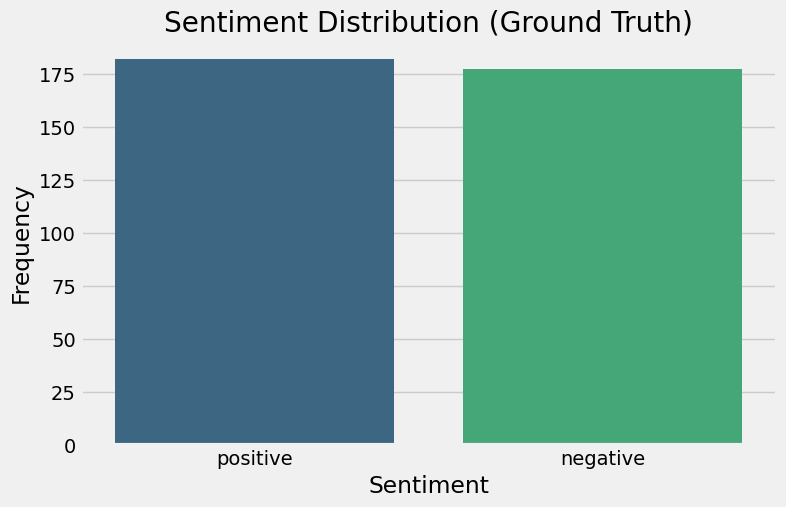

In [30]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution (Ground Truth)')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


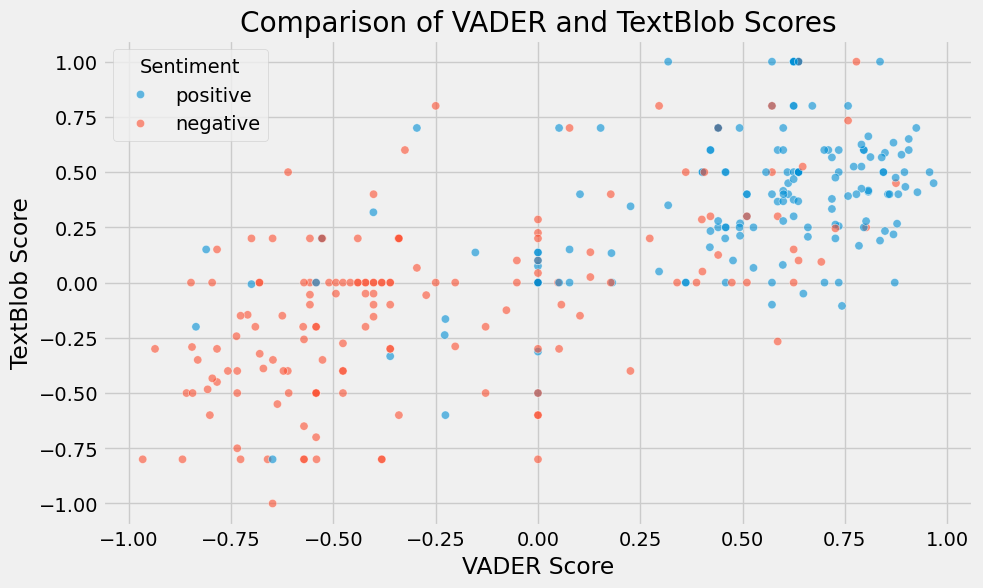

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vader_score', y='textblob_score', hue='sentiment', data=df, alpha=0.6)
plt.title('Comparison of VADER and TextBlob Scores')
plt.xlabel('VADER Score')
plt.ylabel('TextBlob Score')
plt.legend(title='Sentiment')
plt.show()


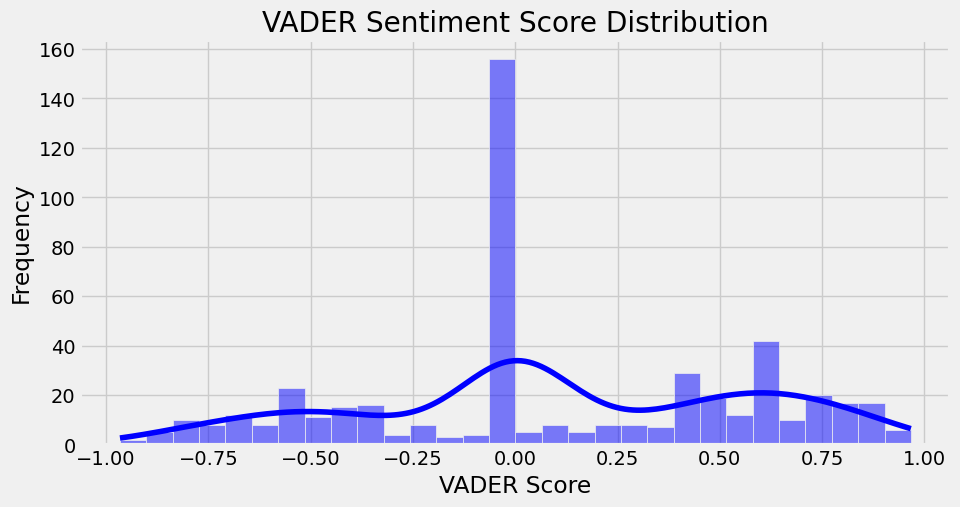

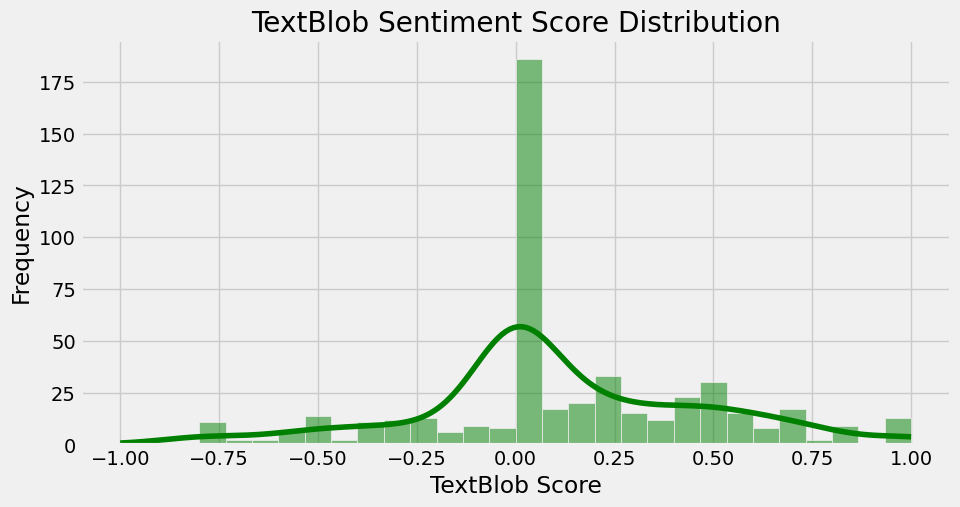

In [32]:
# VADER Score Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['vader_score'], kde=True, color='blue', bins=30)
plt.title('VADER Sentiment Score Distribution')
plt.xlabel('VADER Score')
plt.ylabel('Frequency')
plt.show()

# TextBlob Score Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['textblob_score'], kde=True, color='green', bins=30)
plt.title('TextBlob Sentiment Score Distribution')
plt.xlabel('TextBlob Score')
plt.ylabel('Frequency')
plt.show()


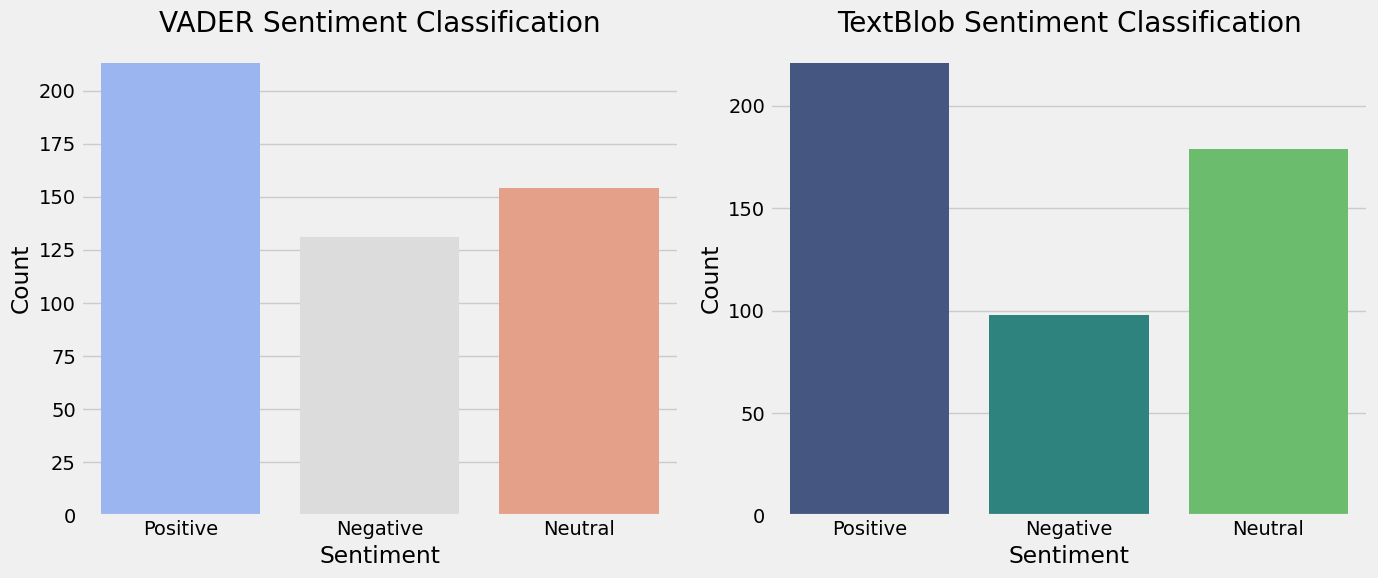

VADER Positive Examples:
                                        processed_text  vader_score
9                               love obama makes jokes       0.7351
236               love google translator good day mate       0.7964
110    rt goodby silversteins new site enjoy nice find       0.7184
485  monday already iran may implode kitchen disast...       0.7579
82   great stanford course thanks making available ...       0.8777

VADER Negative Examples:
                                     processed_text  vader_score
64              twitter api slow clients arent good      -0.3412
378  old cocacola guy gm board stupid heck tcot ala      -0.5267
255                           lebron murdering shit      -0.8360
93             got back church totally hate insects      -0.6115
168                             dentist wrong wrong      -0.7351

TextBlob Positive Examples:
                                        processed_text  textblob_score
317  picked new canon dits beautiful prepare seriou

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data into a DataFrame (if not already loaded)
# df = pd.read_csv('your_file.csv')

# Define thresholds for positive, negative, and neutral sentiment
def classify_sentiment_vader(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

def classify_sentiment_textblob(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

# Add sentiment classification columns
df['vader_sentiment'] = df['vader_score'].apply(classify_sentiment_vader)
df['textblob_sentiment'] = df['textblob_score'].apply(classify_sentiment_textblob)

# Count plot for sentiment classification
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(data=df, x='vader_sentiment', ax=axes[0], palette='coolwarm')
axes[0].set_title('VADER Sentiment Classification')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Count')

sns.countplot(data=df, x='textblob_sentiment', ax=axes[1], palette='viridis')
axes[1].set_title('TextBlob Sentiment Classification')
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Examples of positive and negative sentiments
positive_vader = df[df['vader_sentiment'] == "Positive"].sample(5)
negative_vader = df[df['vader_sentiment'] == "Negative"].sample(5)

positive_textblob = df[df['textblob_sentiment'] == "Positive"].sample(5)
negative_textblob = df[df['textblob_sentiment'] == "Negative"].sample(5)

# Print examples for detailed comparison
print("VADER Positive Examples:")
print(positive_vader[['processed_text', 'vader_score']])
print("\nVADER Negative Examples:")
print(negative_vader[['processed_text', 'vader_score']])

print("\nTextBlob Positive Examples:")
print(positive_textblob[['processed_text', 'textblob_score']])
print("\nTextBlob Negative Examples:")
print(negative_textblob[['processed_text', 'textblob_score']])


# **Key Insights**

### **VADER Positive Examples**
- **Observation**: VADER assigns high positive scores (above 0.7) to texts expressing enthusiasm, gratitude, or positive opinions, even if the language is informal or contains mixed content. Examples:
  - **"love google translator good day mate"** (0.7964): Recognizes "love" and "good day" as strong positive sentiments.
  - **"great stanford course thanks making available online"** (0.8777): Words like "great" and "thanks" drive the high score.
- **Strength**: VADER captures the intensity of positive emotions effectively, even with casual or conversational phrasing.
- **Limitation**: Can overemphasize the sentiment of strong positive words, even if mixed with neutral or irrelevant content.

---

### **VADER Negative Examples**
- **Observation**: VADER assigns high negative scores (below -0.5) to texts that contain explicitly negative language or phrases. Examples:
  - **"dentist wrong wrong wrong"** (-0.7351): Repetition of "wrong" amplifies negativity.
  - **"lebron murdering shit"** (-0.8360): Interprets "murdering" negatively despite slang usage.
- **Strength**: Identifies strong negative words and amplifies their impact in scoring.
- **Limitation**: Context misunderstanding, such as interpreting slang ("murdering") as inherently negative, even if used positively.

---

### **TextBlob Positive Examples**
- **Observation**: TextBlob assigns moderate positive scores to texts with generally positive sentiment, but the scores are less extreme than VADER. Examples:
  - **"picked new canon dits beautiful prepare serious fun"** (0.6621): Positive score due to "beautiful" and "serious fun."
  - **"blink malcolm gladwell amazing book tipping point"** (0.6000): Words like "amazing" increase the positive sentiment.
- **Strength**: TextBlob provides a more balanced approach, capturing positive sentiment without overemphasizing strong positive words.
- **Limitation**: May underweight informal language or strong expressions of positivity.

---

### **TextBlob Negative Examples**
- **Observation**: TextBlob assigns moderate negative scores to texts containing negative sentiment. Examples:
  - **"wolfram alpha sucks even researchers informationally biased"** (-0.3222): The word "sucks" contributes to the negative score.
  - **"sad daybankrupt gm"** (-0.5000): The word "sad" strongly influences the score.
- **Strength**: Captures negativity in formal and informal contexts.
- **Limitation**: Scores tend to be less extreme, which might downplay the impact of strong negative language.

---

### **Key Takeaways**:
1. **VADER**:
   - Excels at capturing sentiment intensity in informal or conversational text.
   - Scores tend to be more extreme, making it better for real-time applications like social media analysis.
   - Sensitive to strong positive/negative words, even in mixed contexts.

2. **TextBlob**:
   - Provides more nuanced and moderate scores, making it better suited for formal or balanced texts.
   - Less sensitive to slang, intensity, or conversational emphasis, which can downplay emotional extremes.

---
